Observation Trends
1) Urban population are highest users of Pyber in terms nbr of rides and fares around 60%

2) Rural population pay more compared to urban and sub urban population

3) Rural population has less nbr of drivers compared to suburban and urban cities

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [136]:
city_file = "raw_data/city_data.csv"
ride_file = "raw_data/ride_data.csv"

city_df_orig = pd.read_csv(city_file, low_memory=False)
ride_df = pd.read_csv(ride_file, low_memory=False)
city_df_orig.count()

city            126
driver_count    126
type            126
dtype: int64

In [137]:
city_df=(city_df_orig.groupby(['city','type']).sum())
city_df.reset_index(inplace=True)
city_df.head()

,city,type,driver_count
0,Alvarezhaven,Urban,21
1,Alyssaberg,Urban,67
2,Anitamouth,Suburban,16
3,Antoniomouth,Urban,21
4,Aprilchester,Urban,49


In [138]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [139]:
complete_data = pd.merge(ride_df, city_df, on=["city","city"], sort="city")
complete_data = complete_data.dropna(how="any")
complete_data.head()

,city,date,fare,ride_id,type,driver_count
0,Alvarezhaven,2016-04-18 20:51:29,31.93,4267015736324,Urban,21
1,Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728,Urban,21
2,Alvarezhaven,2016-09-01 22:57:12,18.09,1197329964911,Urban,21
3,Alvarezhaven,2016-08-18 07:12:06,20.74,357421158941,Urban,21
4,Alvarezhaven,2016-04-04 23:45:50,14.25,6431434271355,Urban,21


In [140]:
average_fare_per_city = pd.DataFrame(complete_data.groupby("city")["fare"].mean())
average_fare_per_city.reset_index(inplace=True)

nbr_of_rides_per_city = pd.DataFrame(complete_data.groupby("city")["ride_id"].count())
nbr_of_rides_per_city.reset_index(inplace=True)

final_city_ride_data=pd.merge(average_fare_per_city,nbr_of_rides_per_city,on="city")

final_city_ride_data = pd.merge(final_city_ride_data,city_df,on="city")

final_city_ride_data = final_city_ride_data.rename(columns={"fare":"Average Fare","ride_id":"Nbr of Rides Per City",
                                                      "driver_count":"Driver Count","type":"Type","city":"City"})

final_pyber_analysis.head()

,City,Average Fare,Nbr of Rides Per City,Type,Driver Count
0,Alvarezhaven,23.928710,31,Urban,21
1,Alyssaberg,20.609615,26,Urban,67
2,Anitamouth,37.315556,9,Suburban,16
3,Antoniomouth,23.625000,22,Urban,21
4,Aprilchester,21.981579,19,Urban,49


In [141]:
urban_df = final_city_ride_data[final_city_ride_data["Type"] == "Urban"]
suburban_df = final_city_ride_data[final_city_ride_data["Type"] == "Suburban"]
rural_df = final_city_ride_data[final_city_ride_data["Type"] == "Rural"]

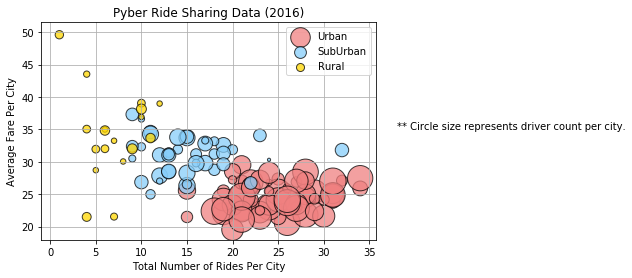

In [142]:
plt.scatter(urban_df["Nbr of Rides Per City"], urban_df["Average Fare"], 
            marker="o", facecolors="lightcoral", edgecolors="black",s=10*urban_df["Driver Count"], alpha=0.75,
           label = "Urban")

plt.scatter(suburban_df["Nbr of Rides Per City"], suburban_df["Average Fare"], 
            marker="o", facecolors="lightskyblue", edgecolors="black",s=10*suburban_df["Driver Count"], alpha=0.75,
            label = "SubUrban")

plt.scatter(rural_df["Nbr of Rides Per City"], rural_df["Average Fare"], 
            marker="o", facecolors="gold", edgecolors="black",s=10*rural_df["Driver Count"], alpha=0.75,label = "Rural")

plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare Per City")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(loc="best")
plt.grid()
plt.text(38, 35, "** Circle size represents driver count per city.")
plt.savefig("final_pyber_analysis.png")
plt.show()

In [143]:
#Total Fares by City Type
#create a dataframe with fare and type
total_fare_city_type = complete_data.groupby("type")["fare"].sum()
total_fare_city_type

type
Rural        4255.09
Suburban    19317.88
Urban       40078.34
Name: fare, dtype: float64

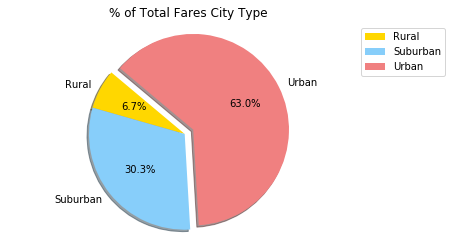

In [144]:
explode =[ 0,0,0.1]
colors = ['gold', 'lightskyblue', 'lightcoral']
fare_city_type_pie = total_fare_city_type.plot(kind="pie",startangle=140,autopct="%1.1f%%",explode=explode,
                                         shadow=True,colors=colors,title="% of Total Fares City Type")
plt.axis('equal')
fare_city_type_pie.set_ylabel(" ")
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("Total_Fares_by_City_Type.png")
plt.show()

In [145]:
#Total Rides by City Type
#create a dataframe with rides and type
total_ride_city_type = complete_data.groupby("type")["city"].count()
total_ride_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

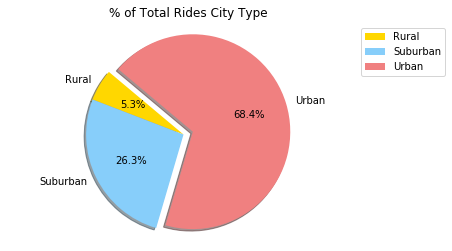

In [146]:
explode =[ 0,0,0.1]
colors = ['gold', 'lightskyblue', 'lightcoral']
ride_city_type_pie = total_ride_city_type.plot(kind="pie",startangle=140,autopct="%1.1f%%",explode=explode,
                                         shadow=True,colors=colors,title="% of Total Rides City Type")
plt.axis('equal')
ride_city_type_pie.set_ylabel(" ")
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("Total_Rides_by_City_Type.png")
plt.show()


In [147]:
#Total Rides by City Type
#create a dataframe with driver and type
total_driver_city_type = city_df.groupby(["type"])["driver_count"].sum()

total_driver_city_type

type
Rural        104
Suburban     638
Urban       2607
Name: driver_count, dtype: int64

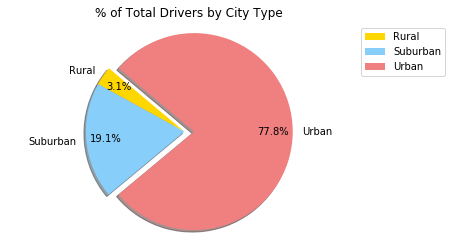

In [149]:
explode =[ 0,0,0.1]
colors = ['gold', 'lightskyblue', 'lightcoral']

driver_city_type_pie = total_driver_city_type.plot(kind="pie",startangle=140,autopct="%1.1f%%",explode=explode,
                                         shadow=True,colors=colors,title="% of Total Drivers by City Type",pctdistance=0.80)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 1))
driver_city_type_pie.set_ylabel(" ")
plt.savefig("Total_Drivers_by_City_Type.png")
plt.show()